# Exercice 2 : analyse en composante principales sur les voitures

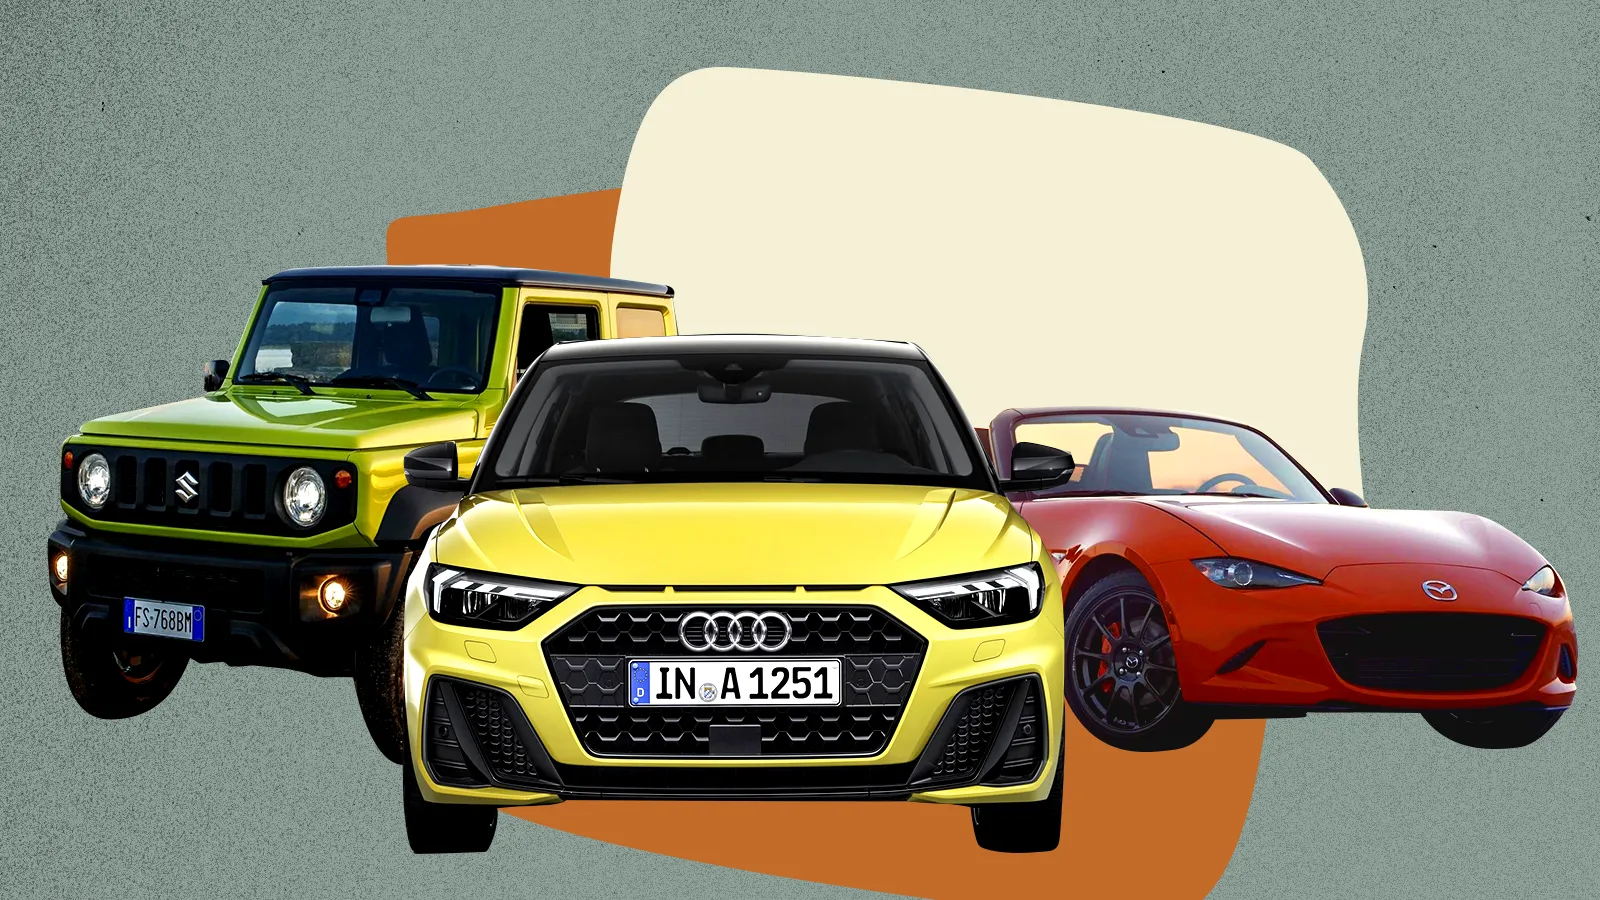

**Consigne :** 
On dispose des mesures suivantes sur plusieurs types de voitures vendues en 2015 dans le fichier
“voitures”. Vous devez effectuer une analyse en composantes principales à l’aide de toutes les variables

L’ACP consiste en une réduction de dimensionnalité. C'est une méthode statistique descriptive permettant de résumer le maximum de l'information contenue dans un tableau de données constitué de n individus et p variables quantitatives

# Import Librairies

In [1]:
import os

In [2]:
print(os.getcwd())
current_path = os.getcwd()
path = os.path.abspath(os.path.join(current_path, '..'))
path

C:\Users\maeva\OneDrive\M1\projet_ML\notebooks\exo2


'C:\\Users\\maeva\\OneDrive\\M1\\projet_ML\\notebooks'

In [3]:
path1 = os.path.abspath(os.path.join(current_path, '..'))
path1

'C:\\Users\\maeva\\OneDrive\\M1\\projet_ML\\notebooks'

In [4]:
path_data = os.path.join(path, 'data')
os.chdir(path_data)
print(os.getcwd())

C:\Users\maeva\OneDrive\M1\projet_ML\notebooks\data


In [5]:
os.listdir()

['chiens.csv',
 'describe.py',
 'simu.txt',
 'voitures.csv',
 'xsimutest.txt',
 '__pycache__']

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy.stats import shapiro
from describe import *
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [7]:
df_voitures = pd.read_csv("voitures.csv")
df_voitures

,Modele,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
0,ALPHAMITO,875,105,406,172,1130,184,11.4,98
1,AUDIA1,999,95,397,174,1065,186,10.9,103
2,CITROENC4,1199,130,442,182,1280,196,10.1,115
3,JAGUARF,2995,340,447,192,1587,260,5.7,234
4,PEUGEOTRCZ,1997,160,428,184,1370,220,8.2,130
5,LANDROVER,2993,256,483,191,2570,180,9.3,203
6,RENAULTCLIO,898,90,406,173,1092,182,12.2,105
7,BMWS3,1995,116,462,181,1570,198,11.1,109
8,DACIA,898,90,406,173,962,175,11.1,116
9,HYUNDAI,1995,136,447,185,1751,184,10.9,139


Avec:
- **CYL** (Nombre de cylindres) 
- **PUIS** (Puissance) 
- **LON** (Longueur), **LAR** (Largeur), **POIDS** (Poids) 
- **VITESSE** (Vitesse maximale) et **ACCEL** (Accélération)
- **CO2** (Émissions de dioxyde de carbone)

# Preprocessing

Avant de procéder à l'analyse de données, nous allons analyser les dataframes pour voir les éventuelles valeurs manquantes, en savoir plus sur nos dataframes et faire du nettoyage de données.

In [ ]:
data_summary(df_voitures)

# Préparation des données pour l'ACP

In [10]:
X = df_voitures.iloc[:, 1:] #Préparation des données pour l'ACP (exclusion de la colonne "Modele")
X

,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
0,875,105,406,172,1130,184,11.4,98
1,999,95,397,174,1065,186,10.9,103
2,1199,130,442,182,1280,196,10.1,115
3,2995,340,447,192,1587,260,5.7,234
4,1997,160,428,184,1370,220,8.2,130
5,2993,256,483,191,2570,180,9.3,203
6,898,90,406,173,1092,182,12.2,105
7,1995,116,462,181,1570,198,11.1,109
8,898,90,406,173,962,175,11.1,116
9,1995,136,447,185,1751,184,10.9,139


Dimension of dataset

In [11]:
print(X.shape)

(20, 8)


In [12]:
n = X.shape[0]
n

20

In [13]:
p = X.shape[1]
p

8

# Analyse univariée et bivariée

- ### Univariée

In [19]:
df_voitures.describe()

,CYL,PUIS,LON,LAR,POIDS,VITESSE,ACCEL,CO2
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2116.35000,181.600000,432.450000,182.250000,1496.700000,203.200000,9.950000,156.050000
std,1389.85839,143.280513,53.803223,9.491686,432.622614,39.578835,2.628287,74.229002
min,875.00000,69.000000,272.000000,163.000000,905.000000,160.000000,4.100000,98.000000
25%,1149.00000,102.500000,406.000000,174.750000,1167.500000,181.500000,9.150000,112.000000
50%,1995.00000,133.000000,443.500000,181.500000,1465.000000,192.500000,10.800000,134.000000
75%,2343.25000,177.750000,464.500000,191.250000,1727.750000,209.000000,11.425000,156.500000
max,6262.00000,660.000000,522.000000,200.000000,2570.000000,335.000000,13.700000,380.000000


In [20]:
df_voitures.describe(include='object')

,Modele
count,20
unique,20
top,ALPHAMITO
freq,1


<AxesSubplot:>

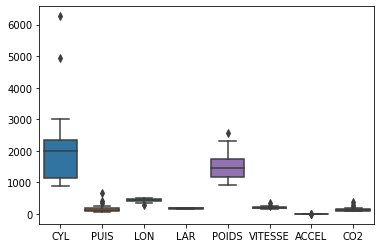

In [21]:
#Analyse descriptives des vairables quantitatives
sns.boxplot(data=df_voitures)

Il y a quelques valeurs extremes.

Variable: CYL
Statistique de test W: 0.790, p-value: 0.000616
La distribution ne semble pas normale (reject H0)



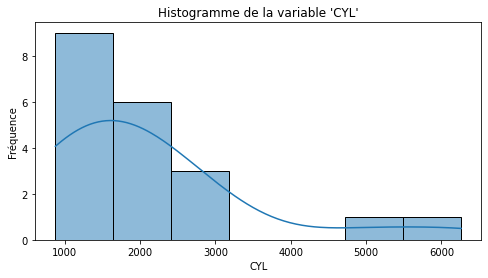

Variable: PUIS
Statistique de test W: 0.688, p-value: 2.82e-05
La distribution ne semble pas normale (reject H0)



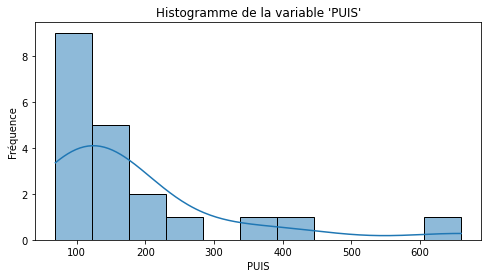

Variable: LON
Statistique de test W: 0.910, p-value: 0.0641
La distribution semble normale (fail to reject H0)



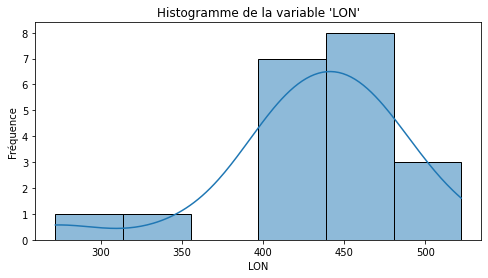

Variable: LAR
Statistique de test W: 0.971, p-value: 0.785
La distribution semble normale (fail to reject H0)



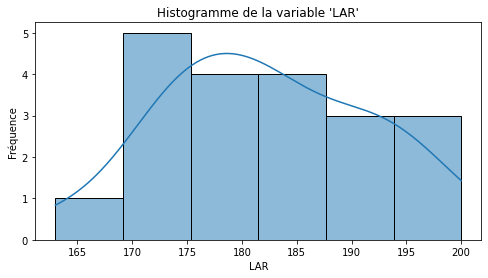

Variable: POIDS
Statistique de test W: 0.935, p-value: 0.196
La distribution semble normale (fail to reject H0)



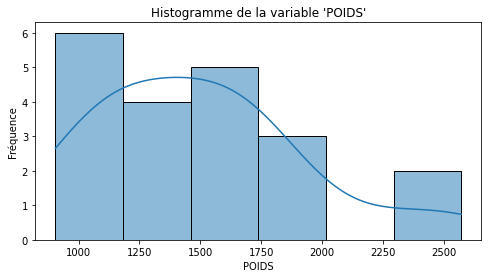

Variable: VITESSE
Statistique de test W: 0.763, p-value: 0.000256
La distribution ne semble pas normale (reject H0)



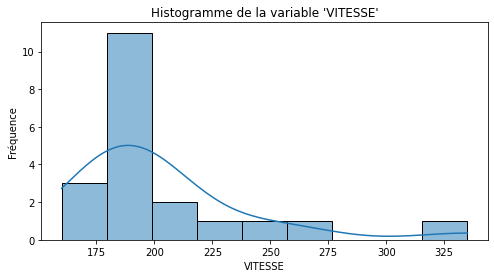

Variable: ACCEL
Statistique de test W: 0.914, p-value: 0.0744
La distribution semble normale (fail to reject H0)



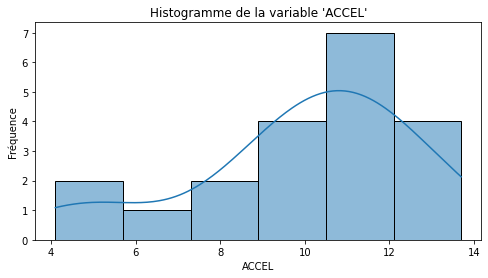

Variable: CO2
Statistique de test W: 0.735, p-value: 0.000107
La distribution ne semble pas normale (reject H0)



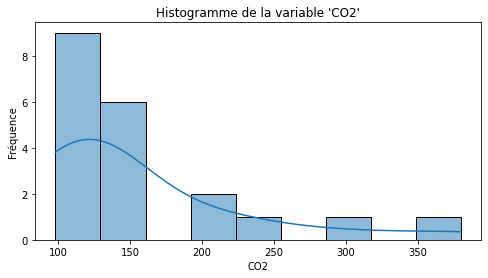

In [23]:
# Application du test de Shapiro-Wilk et création d'histogrammes pour chaque variable numérique
for column in df_voitures.select_dtypes(include=['float64', 'int64']).columns:
    # Test de Shapiro-Wilk
    stat, p_value = shapiro(df_voitures[column])

    # Affichage du résultat du test
    print(f"Variable: {column}")
    print(f"Statistique de test W: {stat:.3f}, p-value: {p_value:.3g}")

    if p_value > 0.05:
        print("La distribution semble normale (fail to reject H0)\n")
    else:
        print("La distribution ne semble pas normale (reject H0)\n")

    # Création de l'histogramme
    plt.figure(figsize=(8, 4))
    sns.histplot(df_voitures[column], kde=True)
    plt.title(f"Histogramme de la variable '{column}'")
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

- ###  Bivariée

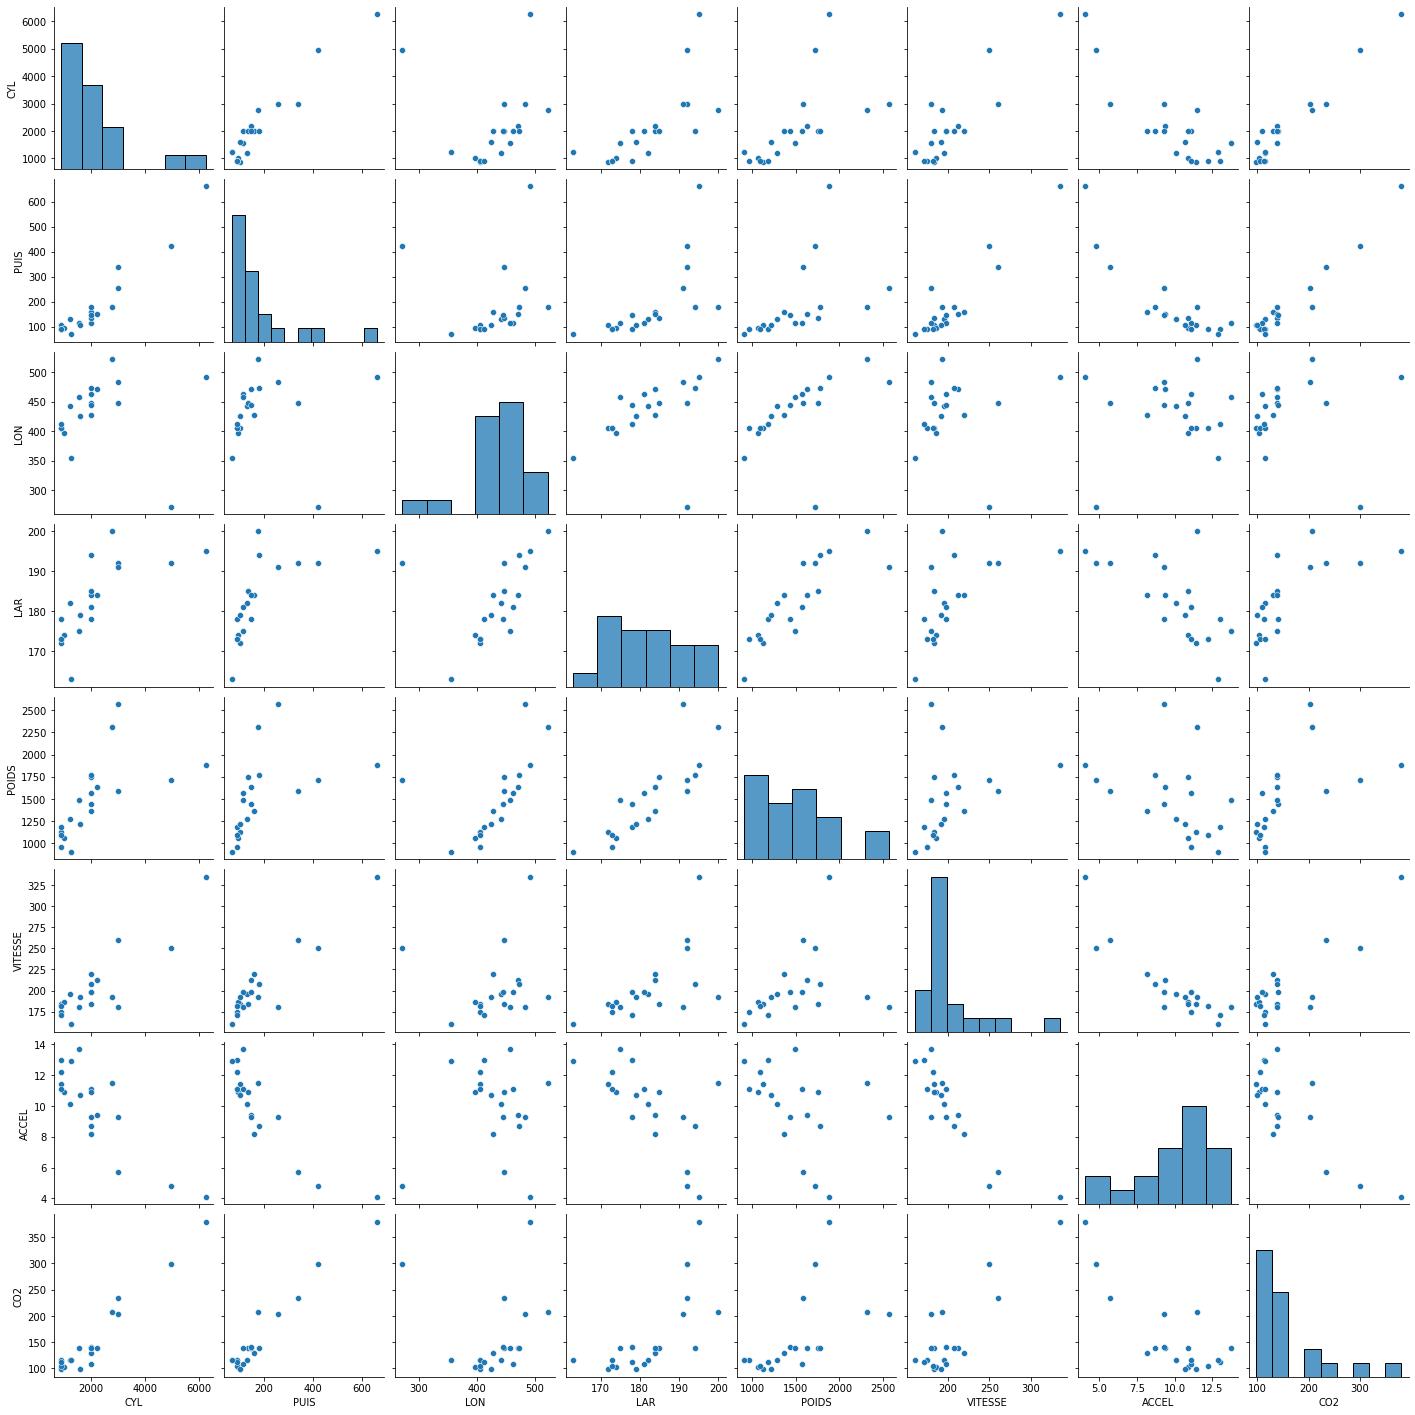

In [29]:
#Relation entre les variables quantitatives
sns.pairplot(df_voitures)
plt.show()

- Matrice de correlation 

On verifie la corrélation entre ces variables pour éviter la redondance. Par exemple, la longueur et la largeur peuvent être fortement corrélées, donc choisir une seule de ces variables pourrait être suffisant.

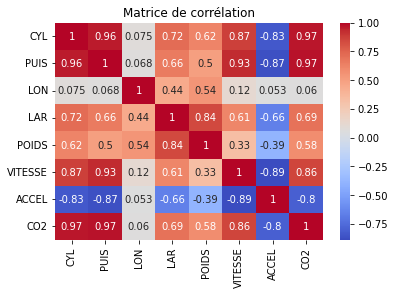

In [24]:
# Calculer la matrice de corrélation
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Coefficient de **corrélation de Pearson** des deux variables : largeur et longueur

In [26]:
# Creation d'un tableau numpy 2D a partir de df_voitures
voitures_array = df_voitures.values
l = voitures_array[:, 3] #longueur
L = voitures_array[:, 4] #Largeur
#Coefficient de correlation entre la largeur et la longueur des voitures

coef_cor, pvalue = pearsonr(l, L)
print(coef_cor, pvalue)

0.44427059876437 0.04970772136476024


Avec une p-value de **0.04**, on pourrait conclure que le coefficient de corrélation de **0.44** est statistiquement significatif, ce qui suggère qu'il existe probablement une relation significative entre les deux variables étudiées.

### Etape 1 : Standardisation des données

Les données étant exprimées dans des unités différentes, nous avons intérêt à réaliser une ACP normée. Pour cela nous avons besoin de retrancher la moyenne à chaque variable puis de diviser par son écart type.

Nous instancions l'objet et l'appliquons à la matrice X. On obtient une matrice Z <br>
<h4>𝑧𝑖𝑗 = (𝑥𝑖𝑗 − 𝑥̅𝑗) / 𝜎𝑗</h4>

Cette matrice représente la transformation des données zij en données standardisées en utilisant la méthode de standardisation. 

In [31]:
X.dtypes

CYL          int64
PUIS         int64
LON          int64
LAR          int64
POIDS        int64
VITESSE      int64
ACCEL      float64
CO2          int64
dtype: object

In [30]:
#On standardise et normalise nos donnees

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Z = sc.fit_transform(X)

pd.DataFrame.from_records(Z)

,0,1,2,3,4,5,6,7
0,-0.916351,-0.548504,-0.504377,-1.107946,-0.869641,-0.497710,0.566022,-0.802355
1,-0.824816,-0.620110,-0.675999,-0.891762,-1.023790,-0.445865,0.370842,-0.733246
2,-0.677178,-0.369488,0.182110,-0.027023,-0.513911,-0.186641,0.058554,-0.567385
3,0.648610,1.134243,0.277455,1.053900,0.214149,1.472392,-1.659030,1.077409
4,-0.088103,-0.154670,-0.084857,0.189162,-0.300473,0.435496,-0.683130,-0.360058
5,0.647133,0.532751,0.963942,0.945808,2.545365,-0.601400,-0.253734,0.648933
6,-0.899373,-0.655913,-0.504377,-0.999854,-0.959759,-0.549555,0.878310,-0.705603
7,-0.089579,-0.469737,0.563492,-0.135115,0.173833,-0.134796,0.448914,-0.650316
8,-0.899373,-0.655913,-0.504377,-0.999854,-1.268058,-0.731012,0.448914,-0.553563
9,-0.089579,-0.326525,0.277455,0.297254,0.603081,-0.497710,0.370842,-0.235662


In [32]:
# On calcule la moyenne le long de l'axe 0 des données standardisées contenues dans la variable Z
print(np.mean(Z,axis=0))

#La moyenne est nulle

[ 1.59594560e-17  1.11889664e-17  1.94289029e-16 -3.33066907e-17
 -1.16573418e-16  2.67147415e-16  2.47024623e-16 -1.73472348e-16]


In [33]:
# On calcule l'écart type le long de l'axe 0 des données standardisées contenues dans la variable Z.
print(np.std(Z,axis=0,ddof=0))

#L'ecart type est egal a 1

[1. 1. 1. 1. 1. 1. 1. 1.]


### Etape 2: Analyse composante principale

On effectue une analyse en composantes principale à l’aides des moyennes mensuelles centrées et normées, les variables CYL, PUIS,LON, LAR, POIDS, VITESSE, ACCEL, CO2 sont considérée comme illustratives (supplémentaires).

L'analyse en composantes principales (ACP) nous permet de résumer et de visualiser les informations contenues dans un ensemble de données comprenant des individus/observations décrits par plusieurs variables quantitatives intercorrélées.

Les informations dans un ensemble de données donné correspondent à la variation totale qu'il contient. Le but de l'ACP est d'identifier les directions (ou composantes principales) le long desquelles la variation dans les données est maximale.

Le paramètre (svd_solver = ‘full’) indique l’algorithme utilisé pour la décomposition en valeurs singulières. Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par défaut pour l’appréhension des bases de taille réduite

In [34]:
acp = PCA(svd_solver = 'full')
acp

PCA(svd_solver='full')

In [35]:
# On calcule les composantes principales des données standardisées et on transforme les données d'origine en un nouvel ensemble de données (coord) basé sur ces composantes principales
coord = acp.fit_transform(Z)

# On retourne le nombre de composantes principales conservées ou sélectionnées par l'analyse
acp.n_components_

8

In [36]:
# On transforme la matrix en dataframe
pd.DataFrame.from_records(coord)

,0,1,2,3,4,5,6,7
0,-2.014687,0.636487,-0.220492,0.051512,0.149541,-0.092904,-0.204275,-0.050729
1,-1.869525,0.824405,-0.154619,-0.182488,0.017065,-0.060033,-0.047507,-0.032547
2,-0.891681,-0.110350,-0.390310,-0.505500,-0.106199,-0.147883,-0.040699,0.057721
3,2.806368,0.436574,-0.611305,-0.668996,-0.041937,-0.331449,0.014906,-0.149968
4,0.149634,0.322055,-0.356353,-0.804719,0.134317,0.167082,0.014080,-0.063968
5,1.768587,-2.094600,1.252174,0.397164,0.721879,-0.272338,-0.115496,0.053438
6,-2.136886,0.555613,-0.165850,0.194178,-0.147214,-0.044952,-0.129318,-0.070966
7,-0.655613,-0.736581,-0.229671,0.015790,0.142366,0.432981,-0.063648,0.010388
8,-2.072992,0.794668,-0.253612,-0.017002,-0.045920,-0.307855,0.213856,0.086503
9,-0.288811,-0.878976,0.468913,-0.004971,0.012189,0.086094,-0.014573,0.027916


## Choix du nombre d'axe

Le pourcentage de variance expliquée est la somme des pourcentages de variance expliquée par les axes de la représentation nous indique, la part de l'information restituée par l'ACP. Plus celle est proche de 100%, meilleure est notre analyse. Cela permet de quantifier le pourcentage d'information gardé ou perdu par notre réduction de dimension.

<h4> \( \frac{n-1}{n} \) </h4> : On ajoute a cette formule la correction qui aide à ajuster ces variances pour obtenir une estimation non biaisée des valeurs propres, ce qui est souvent plus approprié dans le contexte de l'analyse en composantes principales.
 
On renvoie donc d'une part un tableau contenant **la variance expliquée par chaque composante principale à partir des valeurs singulières, la valeur propre et le cumul de la variable expliquée** de l'Analyse en Composantes Principales (PCA pour évaluer la contribution de chaque composante à la variance totale des données.

In [51]:
# Analyse des valeurs propres
# Détermination du nombre de composantes
nombre_composantes = acp.n_components_

# Analyse des valeurs propres
comp = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(nombre_composantes)], 
    "Valeur propre": acp.explained_variance_,
    "% variance expliquée": np.round(acp.explained_variance_ratio_ * 100),
    "% cum. var. expliquée": np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
})

comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,5.841338,69.0,69.0
1,Dim2,1.631792,19.0,89.0
2,Dim3,0.505953,6.0,95.0
3,Dim4,0.295455,4.0,98.0
4,Dim5,0.089212,1.0,99.0
5,Dim6,0.036600,0.0,100.0
6,Dim7,0.014158,0.0,100.0
7,Dim8,0.006543,0.0,100.0


Lecture : Le premier axe factoriel explique a lui seul 69% de la variance totale. 

Text(3.25, 26, '25%')

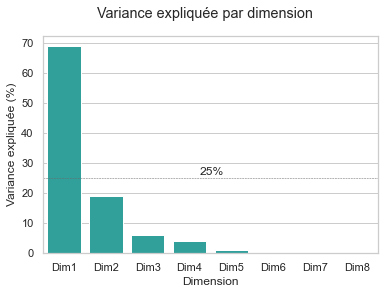

In [53]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

La plus grande quantité d'information est toujours représenté par notre première composante.

# Question 1 : Quel est le pourcentage d’inertie expliquée par les trois premiers facteurs? Par le premier plan factoriel?

In [54]:
# Inertie par les trois premiers facteurs
pourcentage_inertie_3_facteurs = np.sum(acp.explained_variance_ratio_[:3]) * 100
pourcentage_inertie_3_facteurs

94.75161956987544

Le pourcentage d'inertie expliquée par les trois premiers facteurs est de **94.75%**

In [55]:
# inertie par le premier plan factoriel
pourcentage_inertie_premier_plan = np.sum(acp.explained_variance_ratio_[:2]) * 100
pourcentage_inertie_premier_plan

88.7434218618795

Le pourcentage d'inertie expliquée par le premier plan factoriel est de **88.74%**

### Aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


où $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variables  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [66]:
# Calcul du cosinus carré des variables
cos_squared = np.square(acp.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df_voitures.columns[:-1]

df_cos_squared

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Modele,0.168170,0.165667,0.008588,0.124876,0.083416,0.145765,0.140179,0.163338
CYL,0.010212,0.029170,0.483395,0.109911,0.253769,0.041992,0.057280,0.014271
PUIS,0.014686,0.011738,0.408927,0.052643,0.256885,0.236565,0.007055,0.011501
LON,0.090738,0.069325,0.014803,0.273407,0.011220,0.007107,0.359064,0.174336
LAR,0.008080,0.000318,0.014749,0.405778,0.174826,0.024573,0.310631,0.061045
POIDS,0.430854,0.120917,0.009308,0.000043,0.004839,0.140702,0.053002,0.240336
VITESSE,0.142500,0.327962,0.044776,0.000132,0.105358,0.114737,0.071534,0.193000
ACCEL,0.134759,0.274903,0.015453,0.033209,0.109687,0.288560,0.001256,0.142172


Lecture : Le poids est mieux représenté sur le premier axe tandis que la puissance est mieux représentée sur l'axe 3.

In [64]:
# Obtenir les composantes principales
components = acp.components_

# Nombre de composantes égale au nombre de variables numériques
n_components = X.shape[1]
feature_names = X.columns  # Assurez-vous que cela correspond au nombre de variables

# Calcul de la contribution des variables
loadings = acp.components_.T
eigenvalues = acp.explained_variance_
variable_contributions = (loadings**2) * eigenvalues[:, np.newaxis]

# Création du DataFrame
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

variable_contrib_df

,PC1_contrib,PC2_contrib,PC3_contrib,PC4_contrib,PC5_contrib,PC6_contrib,PC7_contrib,PC8_contrib
CYL,0.982338,0.059652,0.085787,0.530032,0.047200,2.516761,0.832392,0.787174
PUIS,0.270334,0.047600,0.019154,0.113124,0.000519,0.197311,0.535167,0.448585
LON,0.004345,0.244575,0.206898,0.007490,0.007462,0.004709,0.022655,0.007818
LAR,0.036895,0.032474,0.015554,0.080780,0.119889,0.000013,0.000039,0.009812
POIDS,0.007442,0.022639,0.022917,0.001001,0.015597,0.000432,0.009399,0.009785
VITESSE,0.005335,0.001537,0.008658,0.000260,0.000899,0.005150,0.004199,0.010561
ACCEL,0.001985,0.000811,0.000100,0.005084,0.004398,0.000750,0.001013,0.000018
CO2,0.001069,0.000093,0.000075,0.001141,0.000399,0.001572,0.001263,0.000930


Lecture : La variable CYL contribue énormément à la formation du premier axe.

# Représentation graphique

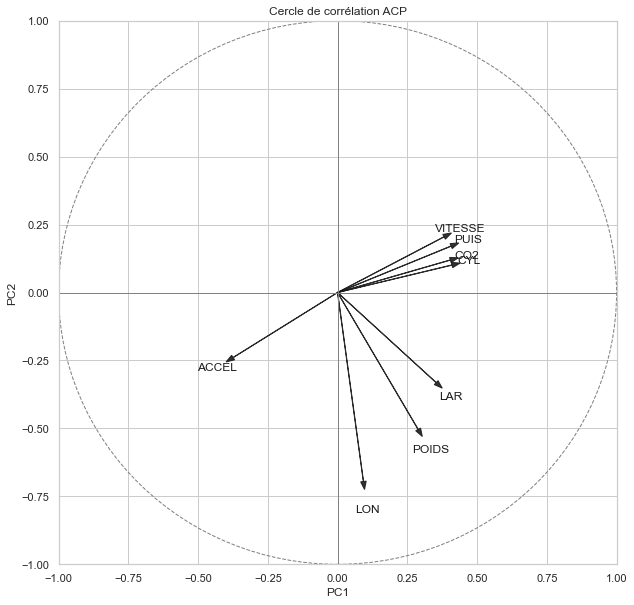

In [69]:
# Créer le cercle de corrélation
coeff = np.transpose(acp.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()


# Question 2 : . Interpréter les 2 axes principaux à partir des corrélations des variables avec ces axes

In [56]:
# Corrélations des variables originales avec les deux premiers axes principaux
correlations = pd.DataFrame(acp.components_[:2], columns=df_voitures.columns[1:]).iloc[:2]

# Afficher les corrélations pour l'interprétation
correlations.transpose()

,0,1
CYL,0.410085,0.101055
PUIS,0.407022,0.170793
LON,0.092674,-0.695266
LAR,0.353378,-0.331528
POIDS,0.288819,-0.503754
VITESSE,0.381792,0.204918
ACCEL,-0.374405,-0.239333
CO2,0.404151,0.119462


**Premier Axe Principal** : Le PC1 met en lumière **un effet de taille** notable, caractérisé par une corrélation positive avec des variables telles que CYL, PUIS, VITESSE et CO2. Les voitures qui se distinguent par des caractéristiques de performance élevées—moteurs volumineux, puissance considérable, vitesse supérieure—et qui sont également associées à des émissions de CO2 plus importantes sont proéminentes sur cet axe. Cela suggère que le PC1 capture un profil de "haute performance environnementale", où les véhicules à forte cylindrée et puissants définissent un segment distinct au sein du jeu de données.

**Deuxième Axe Principal** : Le PC2 révèle **un effet de forme**, comme en témoignent les corrélations négatives avec des variables telles que LON, LAR et POIDS. Cet axe semble distinguer les véhicules plus grands et plus lourds, indiquant que des dimensions plus étendues et un poids accru caractérisent les véhicules situés négativement sur cet axe. Il est intéressant de noter que l'accélération, bien que modérément corrélée, participe également à cet effet de forme, séparant potentiellement les véhicules performants en termes d'accélération de ceux qui privilégient l'espace et le confort.

# Question 3 : Représentez les individus sur le premiers plan factoriel et répondez aux questions suivantes :

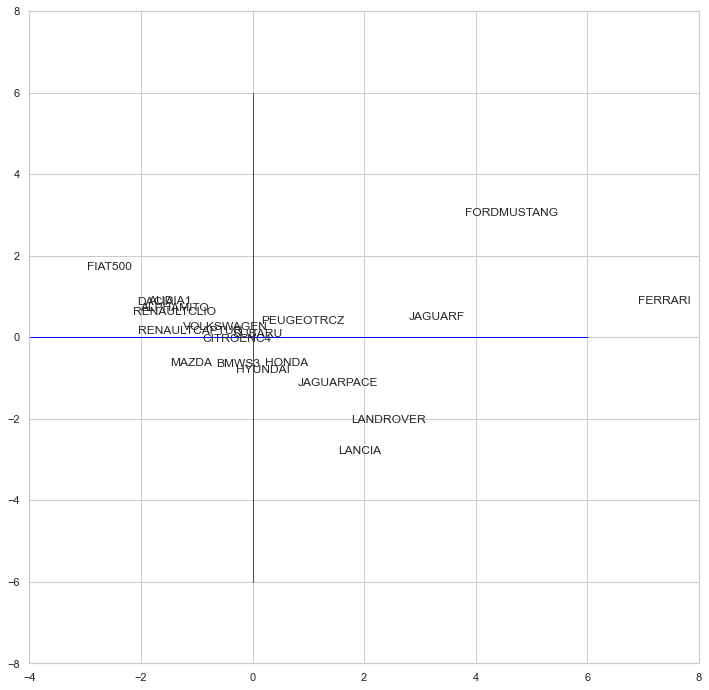

In [70]:
# Nuage de points en fonction des modèles
fig, axes = plt.subplots(figsize=(12, 12))

axes.set_xlim(-4, 8)
axes.set_ylim(-8, 8)  # Correction ici: ajouter une valeur avant la virgule

# Supposons que 'n' est la longueur de votre DataFrame 'df_voitures'
n = len(df_voitures)

for i in range(n):
    plt.annotate(df_voitures['Modele'][i], (coord[i, 0], coord[i, 1]))

plt.plot([-6, 6], [0, 0], color='blue', linestyle='-', linewidth=1)
plt.plot([0, 0], [-6, 6], color='red', linestyle='-', linewidth=1)

plt.show()

### Étape 3: Interprétation des Résultats

- Les voitures situées à droite ont tendance à avoir des valeurs élevées pour les variables corrélées positivement avec le premier axe (performance et impact environnemental).
- Les voitures situées en haut ou en bas ont des caractéristiques distinctes en termes de taille et de poids, comme indiqué par leurs corrélations avec le deuxième axe.

**(a) Les individus sont-ils bien représentés sur le premier plan factoriel?**

La qualité de la représentation des individus sur le premier plan factoriel peut être évaluée par la qualité de représentation des individus (mesures de "cos2" pour chaque individu sur chaque axe). En général, un pourcentage élevé d'inertie expliquée par les deux premiers axes (ici, environ 88.74%) suggère une bonne représentation.


**(b) Quelles sont les caractéristiques des individus en haut du graphe?**

Les individus situés en haut du graphe se caractérisent probablement par des valeurs élevées sur les variables qui ont une corrélation positive forte avec le deuxième axe principal, mais sans une tendance claire par rapport au premier axe.

**(c) Quelles sont les caractéristiques des individus à droite du graphe?**

Les individus à droite du graphe ont probablement des valeurs élevées sur les variables qui sont fortement corrélées positivement avec le premier axe (comme CYL, PUIS, VITESSE, et CO2).


**(d) Quelles sont les caractéristiques des individus en bas à gauche du graphe?**

Ces individus sont susceptibles d'avoir des valeurs faibles sur les variables fortement corrélées avec les deux premiers axes. Cela peut indiquer des voitures plus petites, moins puissantes, moins rapides et plus respectueuses de l'environnementCes individus sont susceptibles d'avoir des valeurs faibles sur les variables fortement corrélées avec les deux premiers axes. Cela peut indiquer des voitures plus petites, moins puissantes, moins rapides et plus respectueuses de l'environnement

**3(e) PEUGEOTRCZ et JAGUARF ont-ils un profil semblable ?**

Bien que les deux modèles soient positionnés du côté positif du premier axe, le JAGUARF est nettement plus éloigné le long de cet axe, suggérant une performance et un impact environnemental plus élevés comparé au PEUGEOTRCZ. Ils partagent certaines caractéristiques mais avec des intensités différentes.

**3(f) LANDROVER et LANCIA ont-ils un profil semblable ?**

Ces deux modèles sont à la fois élevés sur le premier axe et très négatifs sur le deuxième. Cela suggère qu'ils partagent des caractéristiques de performance élevée, mais sont également grands, lourds et possiblement moins agiles. Leur profil semble assez similaire.

**3(g) Interprétation de la représentation graphique des individus:**

En général, la représentation montre une tendance claire où les voitures avec de meilleures performances, plus grandes et plus lourdes, sont différenciées des voitures plus petites, moins puissantes et plus respectueuses de l'environnement. Les individus situés sur le même quadrant partagent probablement des caractéristiques similaires.
